## Importing Libraries and Data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
#Mount the Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Navigate to the folder where the CSV files are stored
%cd '/content/drive/MyDrive/PG Data Science/Course 3 Advanced Machine Learning/Case Study/Telecom/telecom_churn_data.csv'

[Errno 20] Not a directory: '/content/drive/MyDrive/PG Data Science/Course 3 Advanced Machine Learning/Case Study/Telecom/telecom_churn_data.csv'
/content


In [5]:
# Reading the dataset
inp0 = pd.read_csv("/content/drive/MyDrive/PG Data Science/Course 3 Advanced Machine Learning/Case Study/Telecom/telecom_churn_data.csv")

## Data understanding and cleaning

In [6]:
inp0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
inp0.info(226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## Filtering high values customers

In [8]:
inp0.iloc[:,141:145].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
0,362,252,252,0
1,74,384,283,121
2,168,315,116,358
3,230,310,601,410
4,196,350,287,200


In [10]:
inp0.iloc[:,141:145].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_rech_amt_9    0
dtype: int64

In [11]:
inp0['avg_rech_amt_6_7'] = (inp0['total_rech_amt_6'] + inp0['total_rech_amt_7']) / 2

inp0 = inp0.loc[(inp0['avg_rech_amt_6_7'] > np.percentile(inp0['avg_rech_amt_6_7'], 70))]

inp0.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

In [12]:
print(inp0.shape)
inp0.head()

(29979, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0


Filter out high-value customers because they generate 80% of our total revenue.

### Creating the target variable

In [13]:
# we create a target variable by combining the columns total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9.
cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
inp0['Sum'] = inp0['total_ic_mou_9'] + inp0['total_og_mou_9'] + inp0['vol_2g_mb_9'] + inp0['vol_3g_mb_9']
inp0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Sum
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,177.09
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,1077.95
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,590.30
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,718.21


In [16]:
inp0["Churn"] = np.where(inp0.Sum == 0, 1 , 0)

In [17]:
inp0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Sum,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,177.09,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,1077.95,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,590.30,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,718.21,0


In [18]:
inp1 = inp0.drop("Sum", axis = 1)

In [19]:
inp1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0


In [20]:
inp1.Churn.value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

### Dropping Churn Phase features

In [21]:
# We will drop the columns that have the suffix _9
x = []
for i in inp1.columns:
    if i[-1] == "9":
        x.append(i)

In [22]:
inp1 = inp1.drop(x, axis = 1)

In [23]:
inp1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,0,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,0,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0


In [24]:
inp1.Churn.value_counts(normalize = True)

0    0.91364
1    0.08636
Name: Churn, dtype: float64

In [25]:
# We find the columns that contain only unique values.
cols_unique = []
for i in inp1.columns:
    if inp1[i].nunique() == 1:
        cols_unique.append(i)

In [26]:
# Columns with unique values
cols_unique

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [27]:
inp1 = inp1.drop(cols_unique, axis = 1)

We have dropped all the columns that have only one unique value.

In [28]:
inp1.shape

(29979, 160)

In [29]:
# lets check the dataset again
(inp1.isnull().sum() * 100 / len(inp1)).sort_values(ascending = False)

av_rech_amt_data_6    62.016745
count_rech_3g_6       62.016745
arpu_3g_6             62.016745
arpu_2g_6             62.016745
max_rech_data_6       62.016745
                        ...    
vol_2g_mb_6            0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_8            0.000000
vol_3g_mb_6            0.000000
Churn                  0.000000
Length: 160, dtype: float64

### We need to fill in the missing values.

In [30]:
# Identify columns with missing values.
inp0_null = ((inp1.isnull().sum()/len(inp1))*100).reset_index(name='missing_cnt')
inp0_null = inp0_null.loc[inp0_null['missing_cnt'] > 0].sort_values(by = 'missing_cnt', ascending = False)

In [31]:
inp0_null.values

array([['count_rech_2g_6', 62.01674505487175],
       ['total_rech_data_6', 62.01674505487175],
       ['av_rech_amt_data_6', 62.01674505487175],
       ['arpu_3g_6', 62.01674505487175],
       ['max_rech_data_6', 62.01674505487175],
       ['arpu_2g_6', 62.01674505487175],
       ['night_pck_user_6', 62.01674505487175],
       ['count_rech_3g_6', 62.01674505487175],
       ['fb_user_6', 62.01674505487175],
       ['date_of_last_rech_data_6', 62.01674505487175],
       ['night_pck_user_7', 61.13279295506855],
       ['total_rech_data_7', 61.13279295506855],
       ['count_rech_3g_7', 61.13279295506855],
       ['date_of_last_rech_data_7', 61.13279295506855],
       ['max_rech_data_7', 61.13279295506855],
       ['arpu_3g_7', 61.13279295506855],
       ['fb_user_7', 61.13279295506855],
       ['count_rech_2g_7', 61.13279295506855],
       ['av_rech_amt_data_7', 61.13279295506855],
       ['arpu_2g_7', 61.13279295506855],
       ['date_of_last_rech_data_8', 60.83591847626671],
       ['t

In [32]:
inp1.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_

We will remove the following columns from the dataset as they will not have any effect on our model:

* mobile number
* date_of_last_rech_6
* date_of_last_rech_7
* date_of_last_rech_8

There are two date columns, date_of_last_rech_7 and date_of_last_rech_6. The other columns are all recharge columns, which are numeric and could have a minimum value of 0. Therefore, we can impute the minimum value of 0 to each column.

In [33]:
inp1 = inp1.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis =1)

In [34]:
inp1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0


Replace all missing values in the recharge columns with 0.

In [35]:
inp1 = inp1.fillna(0)

In [36]:
inp1.isnull().sum()

arpu_6         0
arpu_7         0
arpu_8         0
onnet_mou_6    0
onnet_mou_7    0
              ..
aug_vbc_3g     0
jul_vbc_3g     0
jun_vbc_3g     0
sep_vbc_3g     0
Churn          0
Length: 156, dtype: int64

### Exploratory Data Analysis

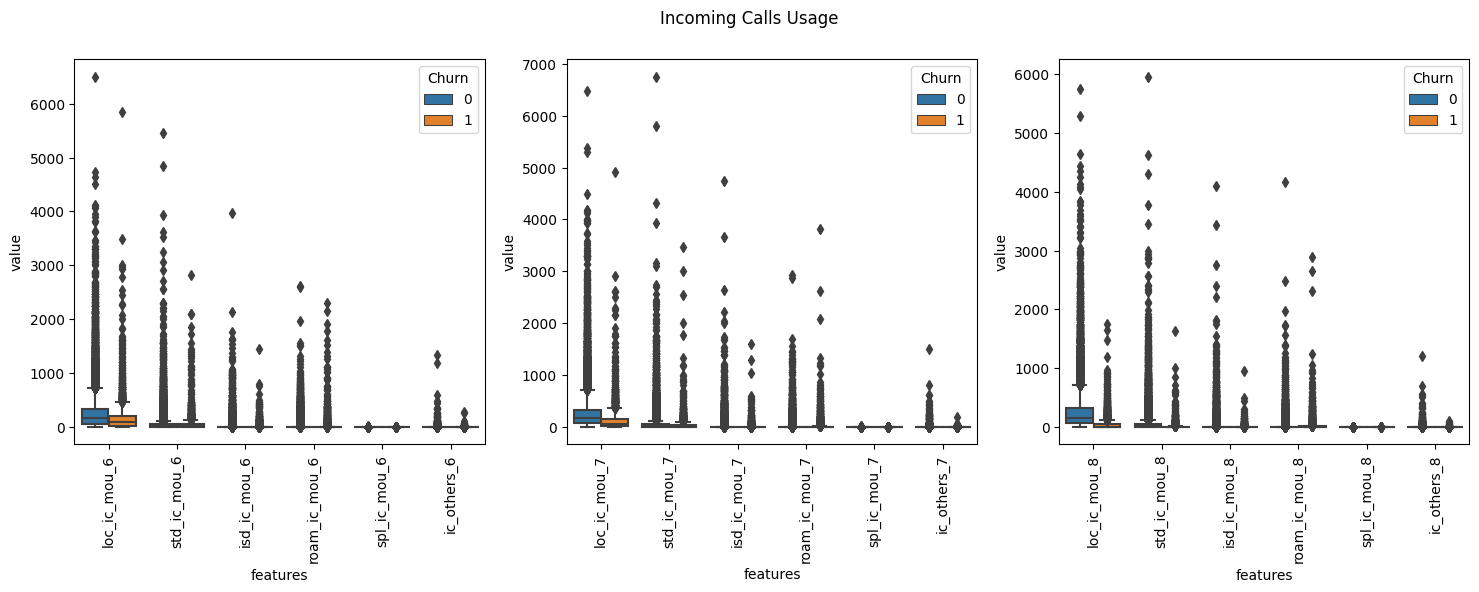

In [37]:
# Visualize the distribution of incoming call usage with a boxplot.
cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8']]

# Visualize the incoming calls usage with a plot.
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([inp1[cols[i]], inp1['Churn']], axis=1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Incoming Calls Usage')

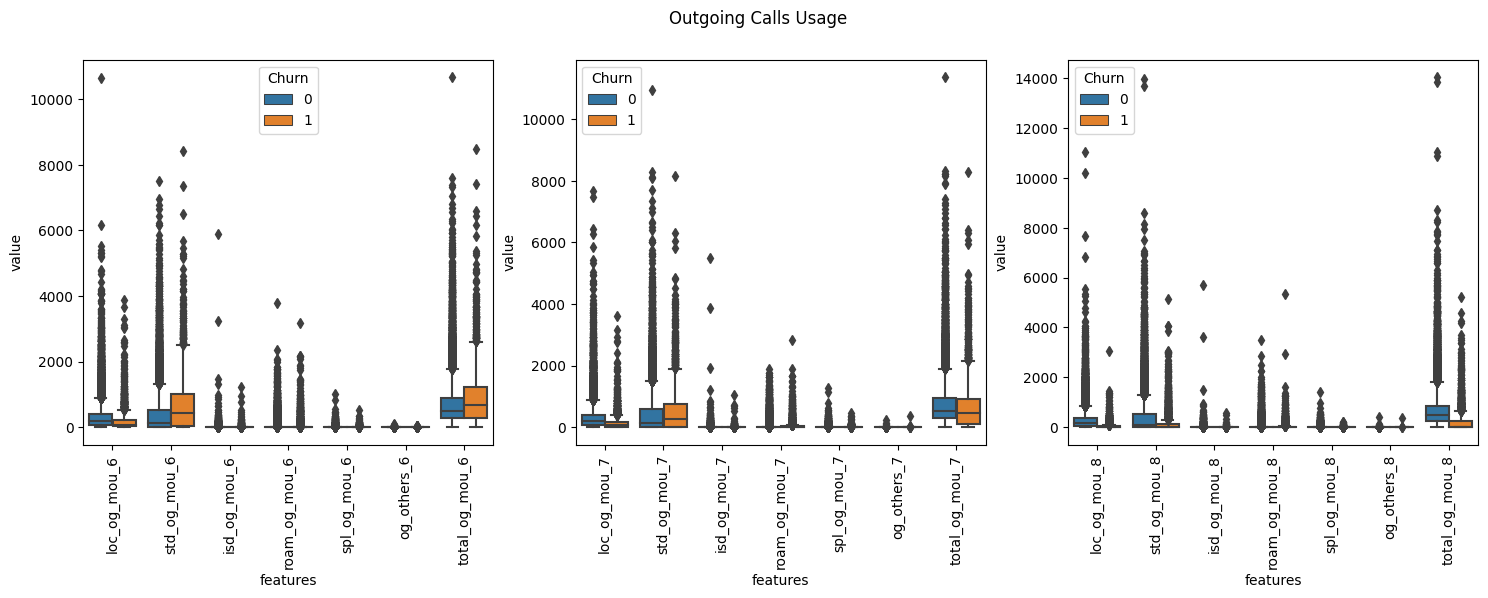

In [38]:
# Visualize the distribution of outgoing calls using a boxplot.
cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]


# Create a plot of the outgoing calls usage.
plt.figure(figsize=(18, 5))
#ic call usage
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([inp1[cols[i]], inp1['Churn']], axis=1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Outgoing Calls Usage')

Outliers are present in almost all columns of the dataset.

The dataset contains outliers in all of its columns.

We will now identify and treat any outliers in the data.

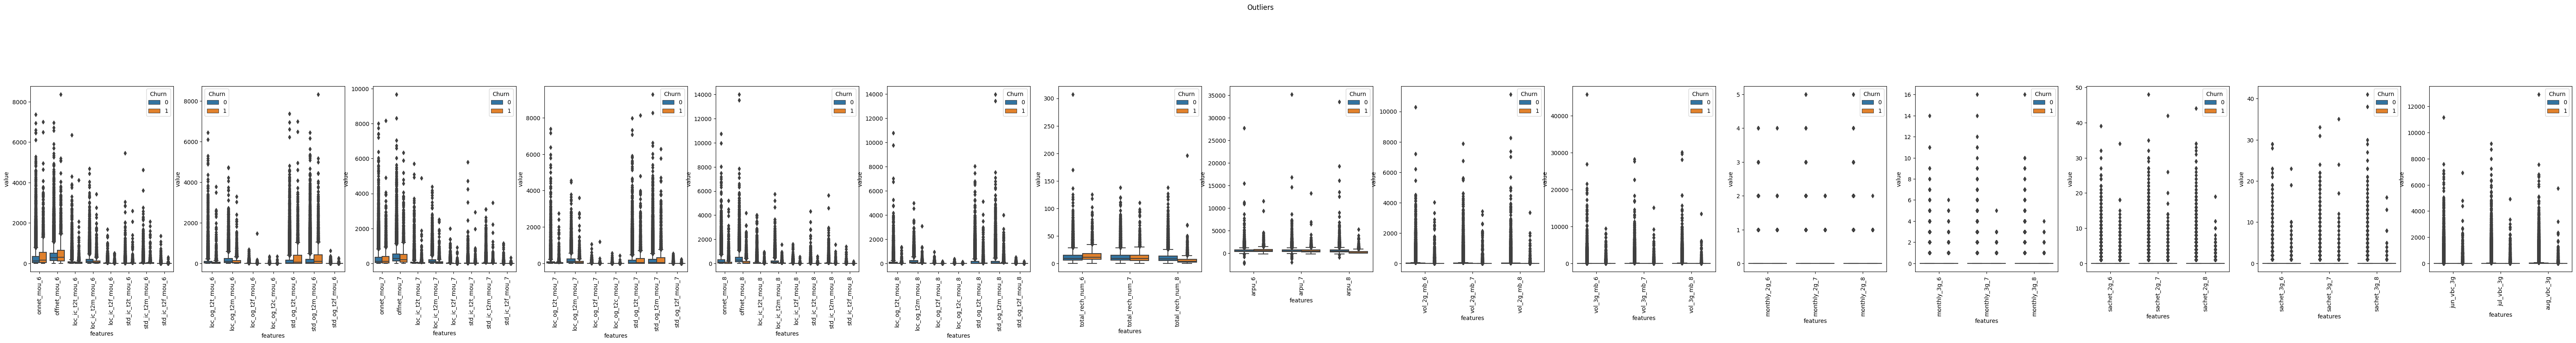

In [39]:
cols=[['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8'],
        ['total_rech_num_6','total_rech_num_7','total_rech_num_8'],
        ['arpu_6','arpu_7','arpu_8'],
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']]

# Plot boxplots for each column in the DataFrame.
plt.figure(figsize=(80, 20))
#Incoming call usage
for i in range(0,15):
    plt.subplot(3, 15, i+1)
    X = pd.concat([inp1[cols[i]], inp1['Churn']], axis=1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Outliers')

In [40]:
cols = list(inp1.columns.values)
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [42]:
cols_to_exclude = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                   'fb_user_6','fb_user_7','fb_user_8',
                   'monthly_2g_6','monthly_2g_7','monthly_2g_8',
                   'monthly_3g_6','monthly_3g_7','monthly_3g_8',
                   'sachet_2g_6','sachet_2g_7','sachet_2g_8',
                   'sachet_3g_6','sachet_3g_7','sachet_3g_8',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                   'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_og_mou_6','og_others_6','spl_og_mou_7','og_others_7','spl_og_mou_8','og_others_8',
                   'loc_og_t2c_mou_6','std_og_t2f_mou_6','std_ic_t2f_mou_6','loc_ic_t2f_mou_6',
                   'loc_og_t2c_mou_7','std_og_t2f_mou_7','std_ic_t2f_mou_7','loc_ic_t2f_mou_7',
                   'loc_og_t2c_mou_8','std_og_t2f_mou_8','std_ic_t2f_mou_8','loc_ic_t2f_mou_8',
                   'aon','churn'
                  ]
cols = list(set(inp1.columns).difference(set(cols_to_exclude)))

# For each column, cap the values at the 99th percentile.
for col in cols:
    percentiles = inp1[col].quantile([0.01,0.95]).values
    #data[col][data[col] <= percentiles[0]] = percentiles[0]
    inp1[col][inp1[col] >= percentiles[1]] = percentiles[1]

Outliers in the following columns will be removed at the 99th percentile.

In [43]:
# Identify and remove outliers from the dataset for specific columns.
data = inp1.loc[~(
                    ((inp1['roam_og_mou_8'] > 2200) & (inp1['Churn'] == 1)) |
                    ((inp1['arpu_7'] > 10000) & (inp1['Churn'] == 1)) |
                    ((inp1['loc_og_mou_8'] > 2000) & (inp1['Churn'] == 1)) |
                    ((inp1['loc_ic_mou_7'] > 4000) & (inp1['Churn'] == 1)) |
                    ((inp1['std_og_mou_7'] > 7000) & (inp1['Churn'] == 1)) |
                    ((inp1['vol_2g_mb_8'] > 2500) & (inp1['Churn'] == 1))
                 )
               ]

In [44]:
cols=[['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8'],
        ['arpu_6','arpu_7','arpu_8'],
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']]


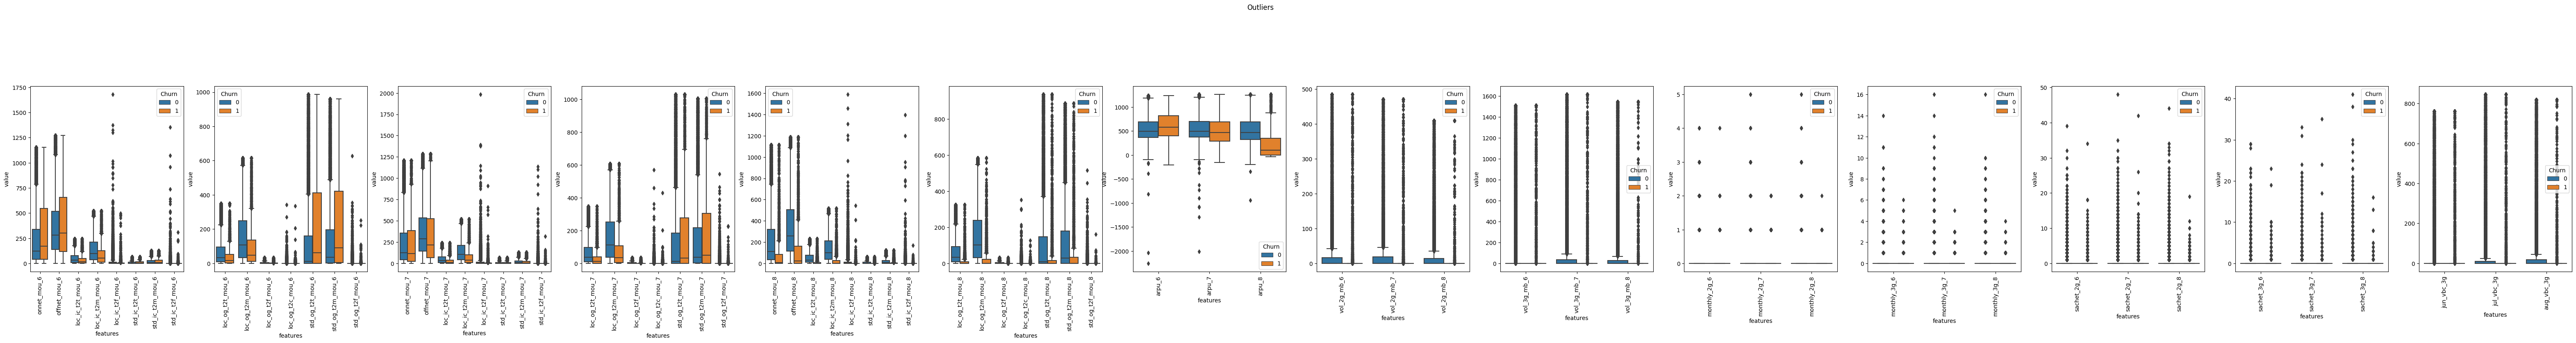

In [45]:
# Plot boxplots for each column in the DataFrame.
plt.figure(figsize=(80, 20))
#Incoming call usage
for i in range(0,14):
    plt.subplot(3, 14, i+1)
    X = pd.concat([inp1[cols[i]], inp1['Churn']], axis=1)
    X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="Churn", data=X)
    plt.xticks(rotation=90)
    plt.suptitle('Outliers')

Outliers have been removed from the dataset.

### Handling Multicollinearity using Correlation

<Axes: >

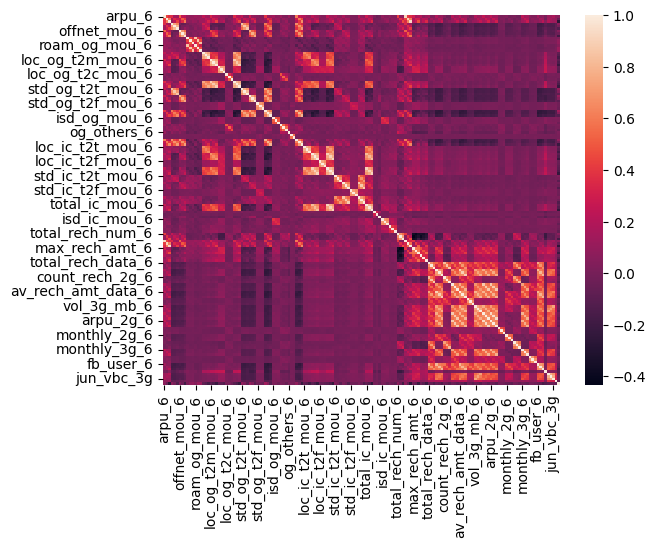

In [47]:
sns.heatmap(inp1.corr())

In [48]:
cor = inp1.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
z = cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending = False)

In [51]:
inp3 = pd.DataFrame(z).reset_index()

In [52]:
inp3 = inp3.rename(columns = {'level_0': 'param_1', 'level_1': 'param_2', 0: 'Corr_Val'})

In [53]:
inp3.head(20)

,param_1,param_2,Corr_Val
0,total_rech_amt_8,arpu_8,0.935997
1,arpu_2g_7,arpu_3g_7,0.935926
2,arpu_2g_8,arpu_3g_8,0.934522
3,arpu_2g_6,arpu_3g_6,0.932496
4,total_rech_amt_6,arpu_6,0.916521
5,loc_ic_mou_8,loc_ic_t2m_mou_8,0.912858
6,total_ic_mou_8,loc_ic_mou_8,0.911720
7,total_ic_mou_6,loc_ic_mou_6,0.910176
8,total_rech_amt_7,arpu_7,0.905711
9,loc_ic_mou_6,loc_ic_t2m_mou_6,0.904781


In [54]:
drop_col_list = ['total_rech_amt_8',
 'std_ic_t2m_mou_8',
 'vol_3g_mb_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'vol_3g_mb_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'total_og_mou_7',
 'loc_og_t2f_mou_7',
 'loc_ic_t2t_mou_8',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_6',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2t_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_og_t2m_mou_8',
 'std_ic_t2m_mou_7',
 'total_og_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'total_og_mou_6',
 'total_rech_amt_7',
 'std_og_t2t_mou_8',
 'loc_og_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'total_ic_mou_6',
 'vol_3g_mb_6',
 'total_rech_amt_6',
 'total_ic_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'total_ic_mou_8',
 'std_ic_t2m_mou_6',
 'loc_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7']

In [55]:
inp2 = inp1.drop(drop_col_list, axis = 1)

In [56]:
inp2.shape

(29979, 117)

<Axes: >

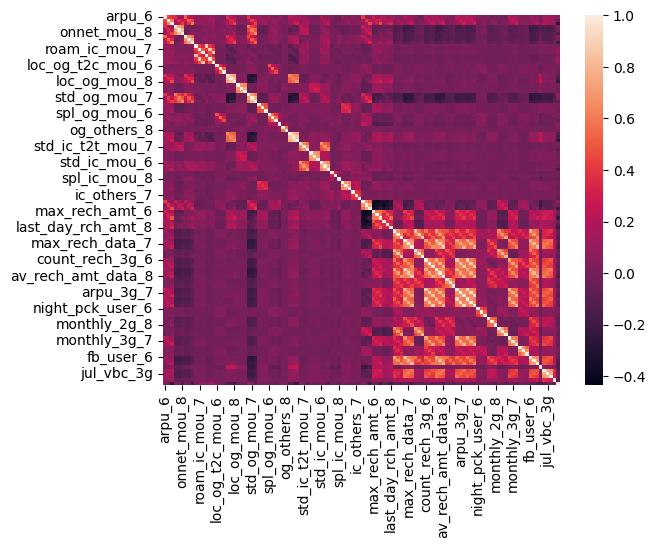

In [57]:
sns.heatmap(inp2.corr())

Multicollinearity has been addressed, so let's proceed with the rest of the analysis.

We will now perform exploratory data analysis (EDA) to gain insights into the data and extract useful information.

<Axes: xlabel='Churn', ylabel='count'>

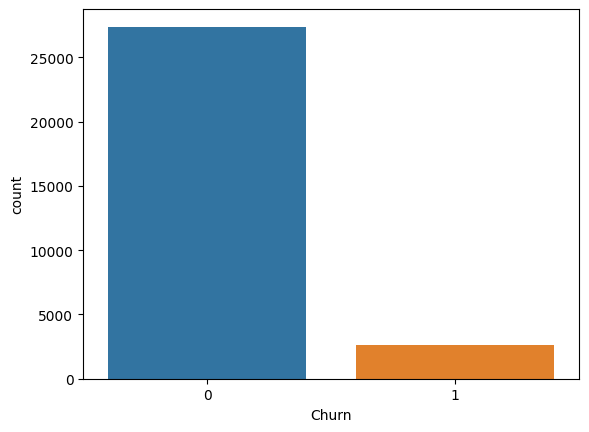

In [58]:
sns.countplot(x='Churn',data=inp2)

The class imbalance is evident, so we need to address it.

### Data Preprocessing

In [59]:
inp2.shape

(29979, 117)

In [60]:
inp2.describe(include = 'all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,559.984864,561.808469,506.679411,263.305352,270.620813,232.417121,384.975464,389.500778,340.743349,9.012917,...,0.140498,0.340939,0.345842,0.327930,1264.158911,96.543861,99.592162,86.292490,1.165508,0.08636
std,283.138216,285.506946,318.335252,321.398966,335.027036,306.619433,337.622252,343.844521,324.438513,23.901853,...,0.975212,0.474033,0.475650,0.469467,975.181038,223.071527,230.855810,205.994134,4.314638,0.28090
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,364.352500,365.235000,289.782000,41.170000,41.045000,27.070000,137.340000,135.690000,95.730000,0.000000,...,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,495.951000,493.781000,452.232000,125.890000,125.560000,99.590000,282.260000,282.040000,241.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,0.00000


In [61]:
# prepare the dataset
y = inp2['Churn']
X = inp2.drop('Churn', axis=1)

In [62]:
X_col=list(X)

### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
inp0_train, inp0_test = train_test_split(inp2, test_size=0.2, random_state=42, stratify=inp2.Churn)

In [65]:
inp0_train.shape, inp0_test.shape

((23983, 117), (5996, 117))

In [66]:
inp0_train.Churn.value_counts(normalize=True)

0    0.913647
1    0.086353
Name: Churn, dtype: float64

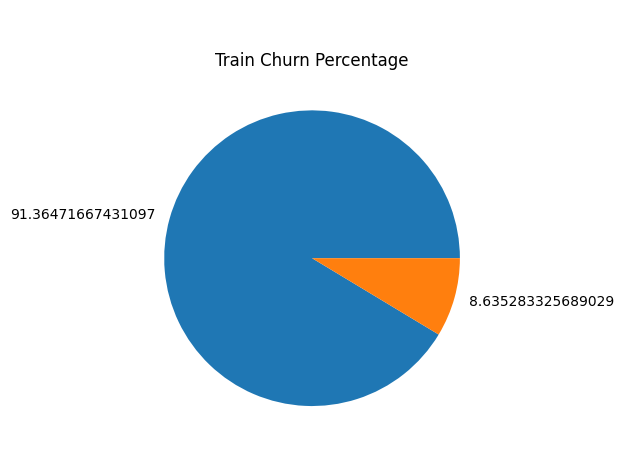

In [67]:
plt.pie(inp0_train.Churn.value_counts(normalize=True), labels = (inp0_train.Churn.value_counts(normalize=True)*100))
plt.title ("\n\nTrain Churn Percentage")

plt.show()

In [68]:
inp0_test.Churn.value_counts(normalize=True)

0    0.913609
1    0.086391
Name: Churn, dtype: float64

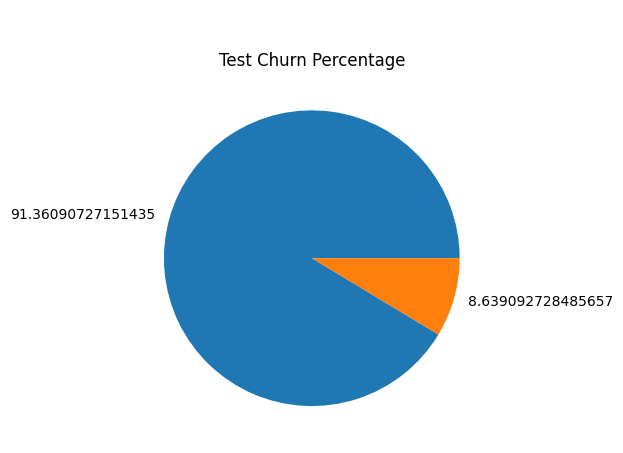

In [69]:
plt.pie(inp0_test.Churn.value_counts(normalize=True), labels = (inp0_test.Churn.value_counts(normalize=True)*100))
plt.title ("\n\nTest Churn Percentage")
plt.show()

### Featuring Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [75]:
# Identify non-numeric columns
non_numeric_cols = inp0_train[X_col].select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Handle date columns
date_cols = [col for col in non_numeric_cols if inp0_train[col].str.match(r'\d{1,2}/\d{1,2}/\d{4}').any()]
for col in date_cols:
    inp0_train[col] = pd.to_datetime(inp0_train[col])
    inp0_test[col] = pd.to_datetime(inp0_test[col])
    inp0_train[col+'_year'] = inp0_train[col].dt.year
    inp0_train[col+'_month'] = inp0_train[col].dt.month
    inp0_train[col+'_day'] = inp0_train[col].dt.day
    inp0_test[col+'_year'] = inp0_test[col].dt.year
    inp0_test[col+'_month'] = inp0_test[col].dt.month
    inp0_test[col+'_day'] = inp0_test[col].dt.day
    X_col.extend([col+'_year', col+'_month', col+'_day'])
    X_col.remove(col)

# After handling dates, remove them from non_numeric_cols
non_numeric_cols = [col for col in non_numeric_cols if col not in date_cols]

# If there are still other non-numeric columns, you'll need to decide how to handle or encode them

# Scaling
inp0_train[X_col] = scaler.fit_transform(inp0_train[X_col])
inp0_test[X_col] = scaler.transform(inp0_test[X_col])


In [78]:
X_train = inp0_train.drop('Churn', axis=1)
y_train = inp0_train['Churn']
X_test = inp0_test.drop('Churn', axis=1)
y_test = inp0_test['Churn']


In [79]:
X_train.describe(include = 'all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,date_of_last_rech_data_6_year,date_of_last_rech_data_6_month,date_of_last_rech_data_6_day,date_of_last_rech_data_7_year,date_of_last_rech_data_7_month,date_of_last_rech_data_7_day,date_of_last_rech_data_8_year,date_of_last_rech_data_8_month,date_of_last_rech_data_8_day
count,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,...,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04,2.398300e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-2.103512e-16,-1.179152e-16,2.370155e-17,-3.555232e-18,-9.125095e-17,-5.688371e-17,6.043894e-17,7.288226e-17,8.117780e-17,-3.318217e-17,...,-6.695687e-17,-3.792247e-17,-3.792247e-17,-7.880764e-17,-1.880125e-15,1.955378e-17,1.143600e-16,-7.898540e-16,4.147771e-17,-1.273958e-17
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,...,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-9.926341e+00,-6.480181e+00,-4.558187e+00,-8.199464e-01,-8.080293e-01,-7.573989e-01,-1.141082e+00,-1.133499e+00,-1.051428e+00,-3.779000e-01,...,-2.691978e-01,-7.797989e-01,-7.797989e-01,-6.761212e-01,-7.952264e-01,-7.952264e-01,-6.921431e-01,-8.001949e-01,-8.001949e-01,-6.903120e-01
25%,-6.902309e-01,-6.900307e-01,-6.804281e-01,-6.917349e-01,-6.846865e-01,-6.691997e-01,-7.342559e-01,-7.377591e-01,-7.546974e-01,-3.779000e-01,...,-2.691978e-01,-7.797989e-01,-7.797989e-01,-6.761212e-01,-7.952264e-01,-7.952264e-01,-6.921431e-01,-8.001949e-01,-8.001949e-01,-6.903120e-01


In [91]:
!pip install imblearn

In [92]:
pip install delayed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 5.3 MB/s eta 0:00:00


### Handling Class Imbalance

In [93]:
# Class Imbalance through Adasyn
from collections import Counter

# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled_ada).items()))

[(0, 21912), (1, 22099)]


We now use the resampled data (X_resampled_ada and y_resampled_ada) for training our model.

In [94]:
X_train = X_resampled_ada
y_train = y_resampled_ada

### MODEL BUILDING

### Using Logistic Reason
Running our First Training Model

In [95]:
import statsmodels.api as sm

In [96]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                44011
Model:                            GLM   Df Residuals:                    43891
Model Family:                Binomial   Df Model:                          119
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17081.
Date:                Tue, 15 Aug 2023   Deviance:                       34162.
Time:                        15:47:09   Pearson chi2:                 3.71e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4567
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.5046      0.015    -34.159      0.000      -0.534      -0.476
arpu_6                             0.1455      0.032      4.528      0.000       0.083       0.208
arpu_7                             0.2931      0.034      8.554      0.000       0.226       0.360
arpu_8                             0.2256      0.041      5.484      0.000       0.145       0.306
onnet_mou_6                        0.2181      0.047      4.598      0.000       0.125       0.311
onnet_mou_7                        0.2001      0.060      3.348      0.001       0.083       0.317
onnet_mou_8                       -0.4089      0.058     -7.066      0.000      -0.522      -0.295
offnet_mou_6                       0.1385      0.050      2.779      0.005       0.041       0.236
offnet_mou_7                       0.3584      0.059      6.024      0.000       0.242       0.475
offnet_mou_8                      -0.3900      0.059     -6.597      0.000      -0.506      -0.274
roam_ic_mou_6                     -0.0930      0.032     -2.944      0.003      -0.155      -0.031
roam_ic_mou_7                      0.1069      0.031      3.396      0.001       0.045       0.169
roam_ic_mou_8                     -0.0012      0.027     -0.044      0.965      -0.055       0.053
roam_og_mou_6                      0.0565      0.031      1.844      0.065      -0.004       0.116
roam_og_mou_7                     -0.1590      0.030     -5.290      0.000      -0.218      -0.100
roam_og_mou_8                      0.3967      0.027     14.841      0.000       0.344       0.449
loc_og_t2c_mou_6                  -0.0931      0.022     -4.280      0.000      -0.136      -0.050
loc_og_t2c_mou_7                   0.0222      0.023      0.969      0.333      -0.023       0.067
loc_og_t2c_mou_8                   0.0723      0.024      3.061      0.002       0.026       0.119
loc_og_mou_6                      -0.2327      0.051     -4.603      0.000      -0.332      -0.134
loc_og_mou_7                      -0.1597      0.060     -2.659      0.008      -0.277      -0.042
loc_og_mou_8                      -0.4709      0.061     -7.740      0.000      -0.590      -0.352
std_og_t2f_mou_6                  -0.0672      0.023     -2.870      0.004      -0.113      -0.021
std_og_t2f_mou_7                  -0.0535      0.037     -1.428      0.153      -0.127       0.020
std_og_t2f_mou_8                  -0.0304      0.039     -0.774      0.439      -0.107       0.047
std_og_mou_6                      -0.1883      0.060     -3.122      0.002      -0.307      -0.070
std_og_mou_7                      -0.2118      0.075     -2.823      0.005      -0.359      -0.065
std_og_mou_8                      -0.0109      0.070     -0.155      0.877      -0.149       0.127
isd_og_mou_6  

### Feature Selection Using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output

In [99]:
%%time
rfe = rfe.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 39.6 s, total: 3min 8s
Wall time: 1min 56s


In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 33),
 ('arpu_7', True, 1),
 ('arpu_8', False, 9),
 ('onnet_mou_6', False, 45),
 ('onnet_mou_7', False, 12),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_6', False, 47),
 ('offnet_mou_7', False, 10),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 73),
 ('roam_ic_mou_7', False, 55),
 ('roam_ic_mou_8', False, 108),
 ('roam_og_mou_6', False, 80),
 ('roam_og_mou_7', False, 51),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 44),
 ('loc_og_t2c_mou_7', False, 100),
 ('loc_og_t2c_mou_8', False, 69),
 ('loc_og_mou_6', False, 36),
 ('loc_og_mou_7', False, 11),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 49),
 ('std_og_t2f_mou_7', False, 68),
 ('std_og_t2f_mou_8', False, 93),
 ('std_og_mou_6', False, 46),
 ('std_og_mou_7', False, 13),
 ('std_og_mou_8', False, 102),
 ('isd_og_mou_6', False, 104),
 ('isd_og_mou_7', False, 81),
 ('isd_og_mou_8', False, 97),
 ('spl_og_mou_6', False, 86),
 ('spl_og_mou_7', False, 101),
 ('spl_og_mou_8', False, 71),
 ('og

In [101]:
col = X_train.columns[rfe.support_]

In [102]:
col

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_mou_8', 'og_others_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8', 'aon',
       'sep_vbc_3g', 'date_of_last_rech_data_8_month',
       'date_of_last_rech_data_8_day'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'date_of_last_rech_data_6_year', 'date_of_last_rech_data_6_month',
       'date_of_last_rech_data_6_day', 'date_of_last_rech_data_7_year',
       'date_of_last_rech_data_7_month', 'date_of_last_rech_data_7_day',
       'date_of_last_rech_data_8_year'],
      dtype='object', length=110)

### Assessing the model with StatsModels


only with 15 features from RFE

**Running our Second Training Model**

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                44011
Model:                            GLM   Df Residuals:                    43995
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18042.
Date:                Tue, 15 Aug 2023   Deviance:                       36084.
Time:                        15:53:35   Pearson chi2:                 5.21e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4324
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5956      0.026    -61.492      0.000      -1.646      -1.545
arpu_7                             0.4073      0.016     24.736      0.000       0.375       0.440
roam_og_mou_8                      0.3763      0.013     29.468      0.000       0.351       0.401
loc_og_mou_8                      -0.7395      0.030    -25.017      0.000      -0.797      -0.682
og_others_8                       -1.8593      0.748     -2.485      0.013      -3.326      -0.393
loc_ic_mou_7                       0.6679      0.031     21.668      0.000       0.607       0.728
loc_ic_mou_8                      -1.1813      0.042    -28.266      0.000      -1.263      -1.099
std_ic_mou_8                      -0.3937      0.018    -21.299      0.000      -0.430      -0.357
spl_ic_mou_8                      -0.3214      0.022    -14.691      0.000      -0.364      -0.279
total_rech_num_8                  -0.7546      0.018    -42.350      0.000      -0.790      -0.720
last_day_rch_amt_8                -0.7451      0.018    -42.396      0.000      -0.780      -0.711
av_rech_amt_data_8                -0.3794      0.028    -13.574      0.000      -0.434      -0.325
aon                               -0.3912      0.017    -22.831      0.000      -0.425      -0.358
sep_vbc_3g                        -0.7947      0.044    -18.218      0.000      -0.880      -0.709
date_of_last_rech_data_8_month     0.3282      0.031     10.624      0.000       0.268       0.389
date_of_last_rech_data_8_day      -0.4358      0.032    -13.653      0.000      -0.498      -0.373
==================================================================================================
"""

In [105]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.007523
1    0.095877
2    0.415937
3    0.001231
4    0.184627
5    0.016020
6    0.068052
7    0.000586
8    0.306543
9    0.366839
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00752269, 0.09587658, 0.41593695, 0.00123123, 0.18462669,
       0.01602019, 0.06805215, 0.0005862 , 0.30654286, 0.36683907])

Creating a DataFrame with the true churn label and the predicted probabilities

In [107]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.007523,0
1,0,0.095877,1
2,0,0.415937,2
3,0,0.001231,3
4,0,0.184627,4


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.007523,0,0
1,0,0.095877,1,0
2,0,0.415937,2,0
3,0,0.001231,3,0
4,0,0.184627,4,0


In [109]:
from sklearn import metrics

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[17615  4297]
 [ 3427 18672]]


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8244984208493331


### Checking VIFs

In [112]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,5.06
13,date_of_last_rech_data_8_month,4.70
14,date_of_last_rech_data_8_day,4.43
4,loc_ic_mou_7,3.13
10,av_rech_amt_data_8,2.72
2,loc_og_mou_8,2.63
9,last_day_rch_amt_8,1.50
8,total_rech_num_8,1.41
0,arpu_7,1.32
11,aon,1.21


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'loc_ic_mou_8' has highest VIF and that too more than 5. So let's start by dropping that.

In [114]:
col = col.drop(['loc_ic_mou_8'], 1)
col

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_mou_8', 'og_others_8',
       'loc_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_8_month', 'date_of_last_rech_data_8_day'],
      dtype='object')

### Running our Third Training Model

In [115]:
# Let's retrain the model using the important features that we selected.
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                44011
Model:                            GLM   Df Residuals:                    43996
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18510.
Date:                Tue, 15 Aug 2023   Deviance:                       37019.
Time:                        16:02:54   Pearson chi2:                 9.50e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4202
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5185      0.026    -57.989      0.000      -1.570      -1.467
arpu_7                             0.4984      0.016     30.793      0.000       0.467       0.530
roam_og_mou_8                      0.4086      0.013     32.055      0.000       0.384       0.434
loc_og_mou_8                      -1.1237      0.028    -40.617      0.000      -1.178      -1.069
og_others_8                       -2.1146      0.849     -2.490      0.013      -3.779      -0.450
loc_ic_mou_7                       0.0418      0.019      2.186      0.029       0.004       0.079
std_ic_mou_8                      -0.4763      0.018    -26.099      0.000      -0.512      -0.441
spl_ic_mou_8                      -0.3384      0.022    -15.214      0.000      -0.382      -0.295
total_rech_num_8                  -0.8646      0.018    -49.163      0.000      -0.899      -0.830
last_day_rch_amt_8                -0.8137      0.017    -46.952      0.000      -0.848      -0.780
av_rech_amt_data_8                -0.4319      0.028    -15.545      0.000      -0.486      -0.377
aon                               -0.4122      0.017    -24.656      0.000      -0.445      -0.379
sep_vbc_3g                        -0.8052      0.044    -18.448      0.000      -0.891      -0.720
date_of_last_rech_data_8_month     0.3158      0.030     10.374      0.000       0.256       0.375
date_of_last_rech_data_8_day      -0.4204      0.031    -13.361      0.000      -0.482      -0.359
==================================================================================================
"""

In [116]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [117]:
y_train_pred[:10]

array([0.01401202, 0.0990398 , 0.33912807, 0.00083617, 0.13102242,
       0.15283532, 0.07482429, 0.00069226, 0.32451836, 0.30562719])

In [118]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [119]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.014012,0,0
1,0,0.099040,1,0
2,0,0.339128,2,0
3,0,0.000836,3,0
4,0,0.131022,4,0


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8175456135966008


Let's check the VIFs again

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,date_of_last_rech_data_8_month,4.70
13,date_of_last_rech_data_8_day,4.43
9,av_rech_amt_data_8,2.71
2,loc_og_mou_8,2.04
4,loc_ic_mou_7,1.64
8,last_day_rch_amt_8,1.47
7,total_rech_num_8,1.35
0,arpu_7,1.27
10,aon,1.21
5,std_ic_mou_8,1.17


The p-value for the og_others_8 feature is very high, indicating that it is not statistically significant. Therefore, we will drop this feature from the model.

In [122]:
col = col.drop( ['og_others_8'], 1)
col

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_mou_7',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_8_month', 'date_of_last_rech_data_8_day'],
      dtype='object')

### Running our Fourth Training Model

In [123]:
# Let's retrain the model with the selected features.
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                44011
Model:                            GLM   Df Residuals:                    43997
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18521.
Date:                Tue, 15 Aug 2023   Deviance:                       37041.
Time:                        16:07:03   Pearson chi2:                 9.46e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4199
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4871      0.022    -66.247      0.000      -1.531      -1.443
arpu_7                             0.4976      0.016     30.767      0.000       0.466       0.529
roam_og_mou_8                      0.4093      0.013     32.118      0.000       0.384       0.434
loc_og_mou_8                      -1.1262      0.028    -40.729      0.000      -1.180      -1.072
loc_ic_mou_7                       0.0426      0.019      2.226      0.026       0.005       0.080
std_ic_mou_8                      -0.4769      0.018    -26.142      0.000      -0.513      -0.441
spl_ic_mou_8                      -0.3383      0.022    -15.207      0.000      -0.382      -0.295
total_rech_num_8                  -0.8646      0.018    -49.180      0.000      -0.899      -0.830
last_day_rch_amt_8                -0.8131      0.017    -46.950      0.000      -0.847      -0.779
av_rech_amt_data_8                -0.4315      0.028    -15.542      0.000      -0.486      -0.377
aon                               -0.4128      0.017    -24.705      0.000      -0.446      -0.380
sep_vbc_3g                        -0.8048      0.044    -18.440      0.000      -0.890      -0.719
date_of_last_rech_data_8_month     0.3153      0.030     10.359      0.000       0.256       0.375
date_of_last_rech_data_8_day      -0.4208      0.031    -13.375      0.000      -0.482      -0.359
==================================================================================================
"""

In [124]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [125]:
y_train_pred[:10]

array([0.01388072, 0.09898355, 0.33898115, 0.00083497, 0.12986261,
       0.15225252, 0.0745054 , 0.00068719, 0.3241704 , 0.30440751])

In [126]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.013881,0,0
1,0,0.098984,1,0
2,0,0.338981,2,0
3,0,0.000835,3,0
4,0,0.129863,4,0


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.81756833518893


In [129]:
# Let's now check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,date_of_last_rech_data_8_month,4.70
12,date_of_last_rech_data_8_day,4.43
8,av_rech_amt_data_8,2.71
2,loc_og_mou_8,2.04
3,loc_ic_mou_7,1.64
7,last_day_rch_amt_8,1.47
6,total_rech_num_8,1.35
0,arpu_7,1.27
9,aon,1.21
4,std_ic_mou_8,1.17


All variables have low VIF scores and high significance, so we do not need to drop any more variables. We can proceed with making predictions using this model.

In [130]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('Recall: ', recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('Precision: ', precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy:  0.81756833518893
F1 score:  0.8222768222768222
Recall:  0.8404905199330286
Precision:  0.8048357743305312
ROC_AUC_SCORE:  0.8174705246616585

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     21912
           1       0.80      0.84      0.82     22099

    accuracy                           0.82     44011
   macro avg       0.82      0.82      0.82     44011
weighted avg       0.82      0.82      0.82     44011


 confussion matrix:
 [[17408  4504]
 [ 3525 18574]]


### Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

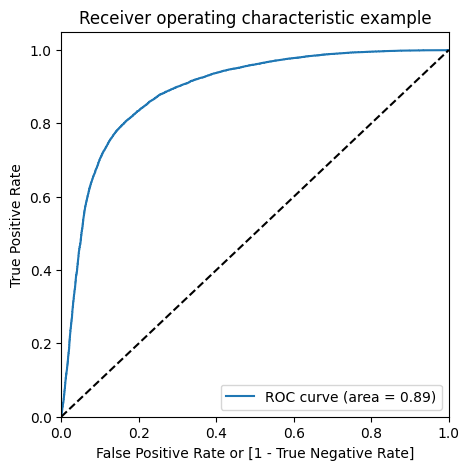

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

The optimal cutoff probability is the probability threshold that produces the highest possible balance between sensitivity and specificity.

In [133]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013881,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.098984,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.338981,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.000835,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.129863,4,0,1,1,0,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.502124  1.000000  0.000000
0.1   0.1  0.683647  0.979999  0.384766
0.2   0.2  0.745791  0.952849  0.536966
0.3   0.3  0.784849  0.922123  0.646404
0.4   0.4  0.807321  0.887778  0.726177
0.5   0.5  0.817568  0.840491  0.794451
0.6   0.6  0.818750  0.787547  0.850219
0.7   0.7  0.802867  0.709127  0.897408
0.8   0.8  0.751358  0.565274  0.939029
0.9   0.9  0.589716  0.203855  0.978870


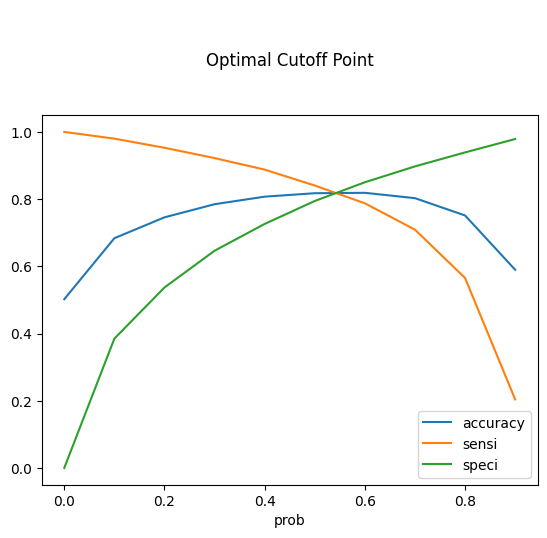

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title ('\n\nOptimal Cutoff Point\n\n')
plt.show()

### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013881,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.098984,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.338981,2,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.000835,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.129863,4,0,1,1,0,0,0,0,0,0,0,0,0


In [137]:
# On train data set

print ('Accuracy: ', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('Recall: ', recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('Precision: ', precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy:  0.81756833518893
F1 score:  0.8222768222768222
Recall:  0.8404905199330286
Precision:  0.8048357743305312
ROC_AUC_SCORE:  0.8174705246616585

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     21912
           1       0.80      0.84      0.82     22099

    accuracy                           0.82     44011
   macro avg       0.82      0.82      0.82     44011
weighted avg       0.82      0.82      0.82     44011


 confussion matrix:
 [[17408  4504]
 [ 3525 18574]]


### Precision and Recall

Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

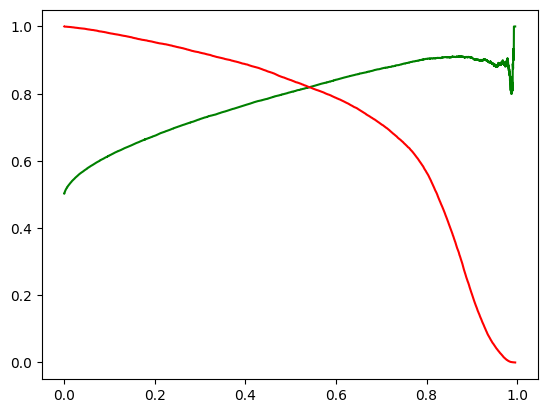

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The threshold is also 0.55 in this case. We can proceed with the analysis.

### Making predictions on the test

In [141]:
X_test = X_test[col]
X_test.head()

,arpu_7,roam_og_mou_8,loc_og_mou_8,loc_ic_mou_7,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,av_rech_amt_data_8,aon,sep_vbc_3g,date_of_last_rech_data_8_month,date_of_last_rech_data_8_day
69709,0.389633,-0.027837,-0.938003,-0.967154,-0.545952,-0.237328,-0.361298,-1.019865,-0.599565,0.845377,-0.269198,-0.800195,-0.690312
54860,2.453022,3.621939,-0.525748,-0.245547,-0.135485,-0.237328,-0.224310,-1.019865,0.943010,0.417464,-0.269198,1.249696,-0.039269
68104,-0.015203,0.553242,0.067110,-0.446844,-0.546344,-0.237328,-0.361298,-1.019865,0.779404,0.437008,-0.269198,1.249696,1.541837
39577,-0.357951,0.286972,1.131727,0.632421,-0.672913,-0.237328,-0.361298,0.593651,-0.599565,2.457253,-0.269198,-0.800195,-0.690312
67566,-0.592869,-0.361716,-0.423852,2.612788,-0.680358,-0.237328,0.460627,-0.895749,-0.599565,0.446265,-0.269198,-0.800195,-0.690312


In [142]:
X_test_sm = sm.add_constant(X_test)

In [143]:
y_test_pred = res.predict(X_test_sm)

In [144]:
y_test_pred[:10]

69709    0.795347
54860    0.953196
68104    0.392886
39577    0.044556
67566    0.431077
52615    0.906365
55093    0.041371
30834    0.327824
67103    0.018279
80343    0.003136
dtype: float64

In [145]:
# Converting the array y_pred to a Pandas DataFrame.
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Let's see the head
y_pred_1.head()

,0
69709,0.795347
54860,0.953196
68104,0.392886
39577,0.044556
67566,0.431077


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Churn,CustID,0
0,0,69709,0.795347
1,0,54860,0.953196
2,0,68104,0.392886
3,0,39577,0.044556
4,0,67566,0.431077


In [152]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [153]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]

In [154]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,69709,0,0.795347
1,54860,0,0.953196
2,68104,0,0.392886
3,39577,0,0.044556
4,67566,0,0.431077


In [155]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [156]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,69709,0,0.795347,1
1,54860,0,0.953196,1
2,68104,0,0.392886,0
3,39577,0,0.044556,0
4,67566,0,0.431077,0


In [157]:
print ('Accuracy: ', accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))
print ('F1 score: ', f1_score(y_pred_final.Churn, y_pred_final.final_predicted))
print ('Recall: ', recall_score(y_pred_final.Churn, y_pred_final.final_predicted))
print ('Precision: ', precision_score(y_pred_final.Churn, y_pred_final.final_predicted))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_pred_final.Churn, y_pred_final.final_predicted))
print ('\n clasification report:\n', classification_report(y_pred_final.Churn, y_pred_final.final_predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted))

Accuracy:  0.8270513675783856
F1 score:  0.45219228737453776
Recall:  0.8262548262548263
Precision:  0.31127272727272726
ROC_AUC_SCORE:  0.8266907574136491

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      5478
           1       0.31      0.83      0.45       518

    accuracy                           0.83      5996
   macro avg       0.65      0.83      0.67      5996
weighted avg       0.92      0.83      0.86      5996


 confussion matrix:
 [[4531  947]
 [  90  428]]


Our logistic regression model performed well on the test data, but the
precision was low. However, the recall was good.

We are prioritizing recall because it measures the number of true positives divided by the sum of true positives and false negatives. In our case, we need to identify all churning customers, so we cannot afford to miss any (false negatives).

We will now try a decision tree model to see if we can improve the precision without sacrificing recall.

### Using Decision Trees

In [158]:
X_train = X_resampled_ada
y_train = y_resampled_ada

In [160]:
X_test = inp0_test.drop('Churn', axis=1)
y_test = inp0_test['Churn']

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [163]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [164]:
X_test.shape

(5996, 125)

In [179]:
# Convert the datetime columns in test set to days, similar to train set
earliest_date = pd.Timestamp('1970-01-01')
X_test['date_of_last_rech_data_6'] = (pd.to_datetime(X_test['date_of_last_rech_data_6']) - earliest_date).dt.days


In [182]:
for col in remaining_datetime_cols:
    # If the column data type is already float64, skip the conversion.
    if X_train[col].dtype == 'float64':
        continue

    placeholder_date = pd.Timestamp('1970-01-01')  # Using Unix epoch as a placeholder

    # Convert datetime columns to number of days since placeholder_date
    X_train[col] = (X_train[col] - placeholder_date).dt.days
    X_test[col] = (X_test[col] - placeholder_date).dt.days

    # Now, both columns are in integer format. You can find the earliest date and perform the subtraction
    earliest_day = min(X_train[col].min(), X_test[col].min())
    X_train[col] -= earliest_day
    X_test[col] -= earliest_day

In [185]:
print(X_test.dtypes)


arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
                                   ...   
date_of_last_rech_data_7_month    float64
date_of_last_rech_data_7_day      float64
date_of_last_rech_data_8_year     float64
date_of_last_rech_data_8_month    float64
date_of_last_rech_data_8_day      float64
Length: 125, dtype: object


In [186]:
for col in datetime_cols:
    if X_test[col].dtype == 'datetime64[ns]':
        placeholder_date = pd.Timestamp('1970-01-01')  # Unix epoch
        X_test[col] = (X_test[col] - placeholder_date).dt.days


In [187]:
y_test_pred = dt_base.predict(X_test)


In [188]:
print(X_test.dtypes)


arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
                                   ...   
date_of_last_rech_data_7_month    float64
date_of_last_rech_data_7_day      float64
date_of_last_rech_data_8_year     float64
date_of_last_rech_data_8_month    float64
date_of_last_rech_data_8_day      float64
Length: 125, dtype: object


In [189]:
for col in datetime_cols:
    if X_test[col].dtype == 'datetime64[ns]':
        placeholder_date = pd.Timestamp('1970-01-01')  # Using Unix epoch as a placeholder
        X_test[col] = (X_test[col] - placeholder_date).dt.days


In [190]:
y_test_pred = dt_base.predict(X_test)


In [194]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8172114743162108
F1 score:  0.4475806451612902
Recall:  0.8571428571428571
Precision:  0.30286493860845837
ROC_AUC_SCORE:  0.8352892087831847

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      5478
           1       0.30      0.86      0.45       518

    accuracy                           0.82      5996
   macro avg       0.64      0.84      0.67      5996
weighted avg       0.92      0.82      0.85      5996


 confussion matrix:
 [[4456 1022]
 [  74  444]]


### Plot the ROC curve

In [198]:
# Predicting probabilities for the test set
y_test_probs = dt_base.predict_proba(X_test)[:, 1]


In [199]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test_probs are the predicted probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_test_probs)

print("AUC Score:", auc_score)


AUC Score: 0.889016931185606


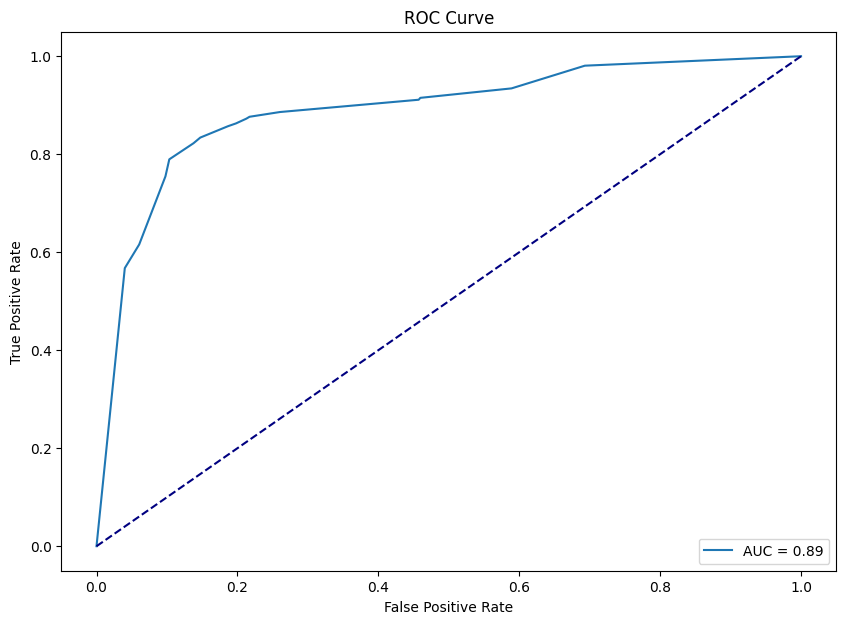

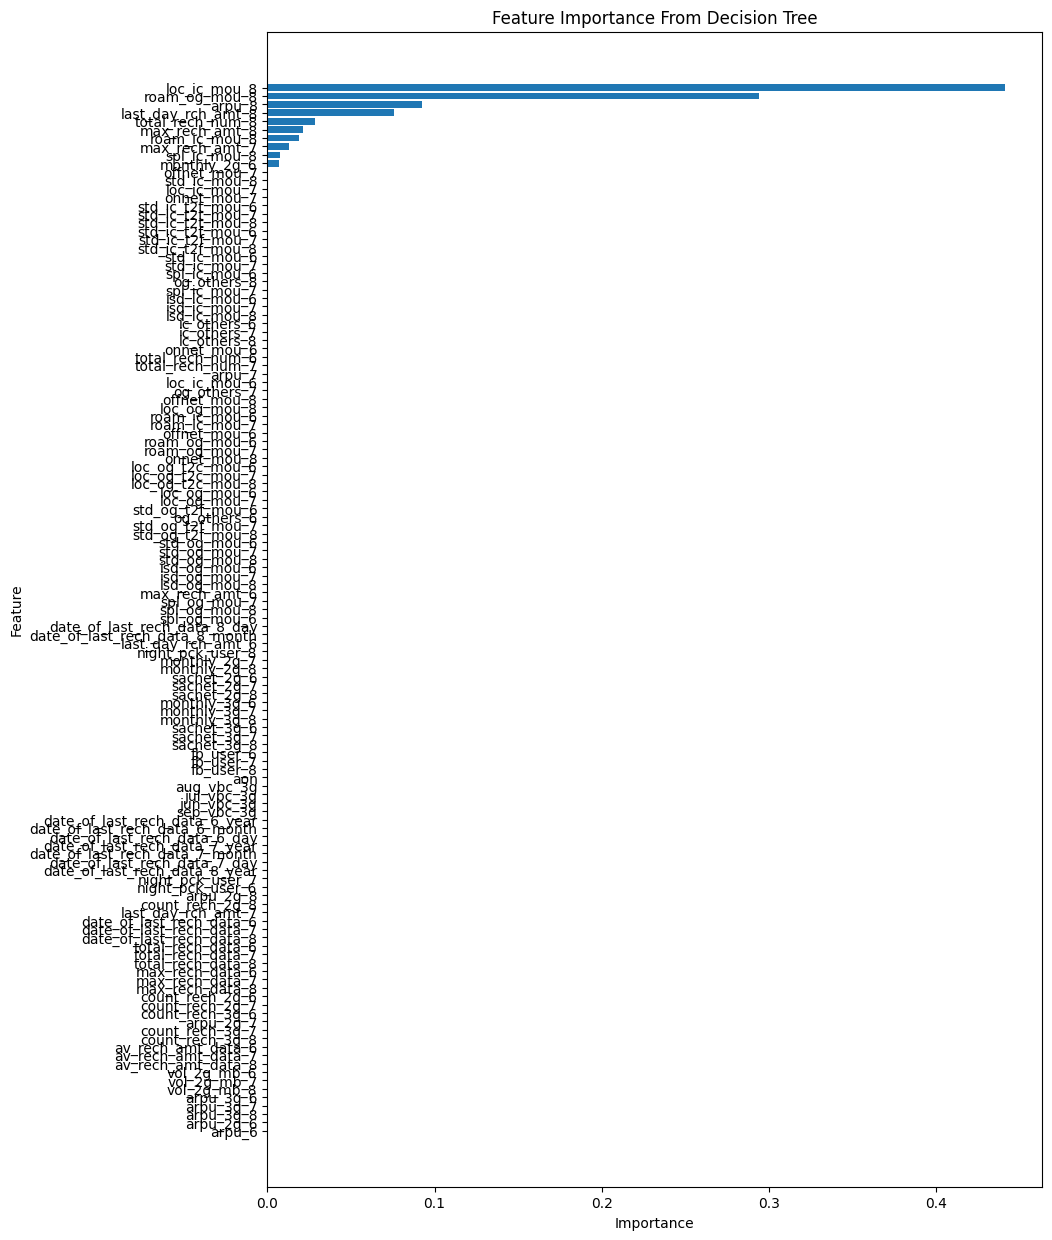

In [201]:
# 1. Visualizing the ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 2. Extract and Visualize Feature Importance
feature_importance = dt_base.feature_importances_
features = X_train.columns

# Sorting the features based on importance
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 15))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance From Decision Tree')
plt.show()


Our random decision tree gives good recall but precision and accuracy is low. So lets tune hyperparameters.

### Hyper-parameter tuning for the Decision Tree

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
dt = DecisionTreeClassifier(random_state=42)

In [204]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [205]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [206]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 4.28 s, sys: 393 ms, total: 4.67 s
Wall time: 2min 23s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [207]:
grid_search.best_score_

0.8827113580912135

In [208]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

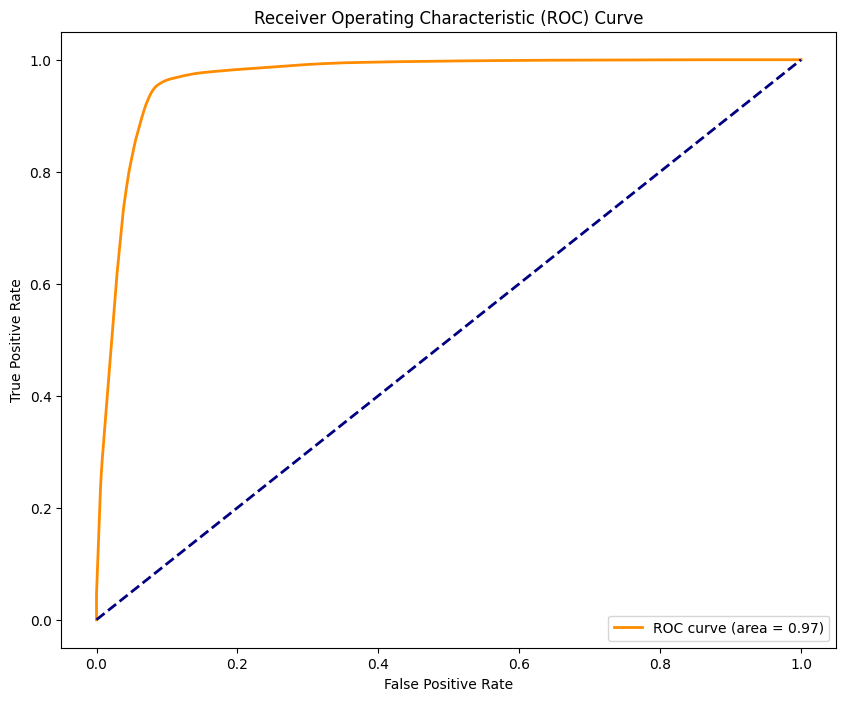

In [214]:
# Predict probabilities for the positive class
y_train_prob = dt_best.predict_proba(X_train)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

# Compute the AUC (Area under the curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [215]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [216]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8782521681120747
F1 score:  0.5247395833333333
Recall:  0.777992277992278
Precision:  0.39587426326129665
ROC_AUC_SCORE:  0.8328625135854051

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      5478
           1       0.40      0.78      0.52       518

    accuracy                           0.88      5996
   macro avg       0.69      0.83      0.73      5996
weighted avg       0.93      0.88      0.90      5996


 confussion matrix:
 [[4863  615]
 [ 115  403]]


After tuning the hyperparameters of our decision tree model, we achieved improved accuracy and precision. The model also gave good recall in the test data. However, we believe that we can further improve the model's performance by using feature selection.

### Feature Selection using RFECV- Decision Tree estimator

In [217]:
from sklearn.feature_selection import RFECV

In [218]:
rfecv = RFECV(estimator=dt_base, cv=4)

In [219]:
%%time
rfecv.fit(X_train, y_train)

CPU times: user 5min 34s, sys: 12.2 ms, total: 5min 34s
Wall time: 5min 37s


RFECV(cv=4, estimator=DecisionTreeClassifier(max_depth=4, random_state=42))

In [222]:
import sklearn
print(sklearn.__version__)

1.2.2


In [223]:
print(dir(rfecv))


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_estimator_type', '_fit', '_get_param_names', '_get_support_mask', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_sklearn_auto_wrap_output_keys', '_transform', '_validate_data', '_validate_params', 'classes_', 'cv', 'cv_results_', 'decision_function', 'estimator', 'estimator_', 'feature_names_in_', 'fit', 'fit_transform', 'get_feature_names_out', 'get_params', 'get_support', 'importance_getter', 'inverse_transform', 'min_features_

In [226]:
cv_results = rfecv.cv_results_
print(cv_results)


{'mean_test_score': array([0.74692716, 0.82399894, 0.83720021, 0.85074216, 0.84860636,
       0.84883359, 0.8481974 , 0.84826556, 0.84908354, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524, 0.84951524, 0.84951524,
       0.84951524, 0.84951524, 0.84951524,

In [228]:
num_features = X_train.shape


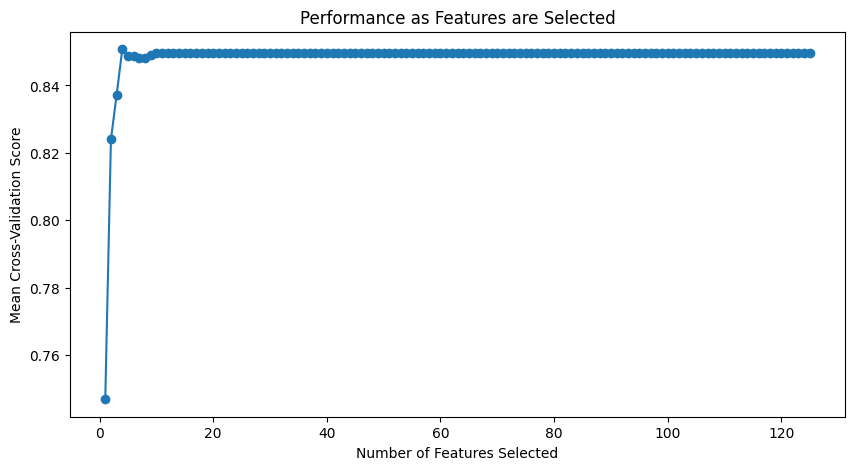

In [232]:
# Extract the mean test scores
mean_test_scores = rfecv.cv_results_['mean_test_score']

plt.figure(figsize=[10, 5])
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores, 'o-')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Performance as Features are Selected')
plt.show()


In [233]:
rfecv.n_features_

4

The total number of features selected is 4.

In [235]:
list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))

[('arpu_6', False, 122),
 ('arpu_7', False, 121),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 21),
 ('onnet_mou_8', False, 19),
 ('offnet_mou_6', False, 18),
 ('offnet_mou_7', False, 17),
 ('offnet_mou_8', False, 16),
 ('roam_ic_mou_6', False, 15),
 ('roam_ic_mou_7', False, 24),
 ('roam_ic_mou_8', False, 4),
 ('roam_og_mou_6', False, 27),
 ('roam_og_mou_7', False, 14),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 30),
 ('loc_og_t2c_mou_7', False, 32),
 ('loc_og_t2c_mou_8', False, 34),
 ('loc_og_mou_6', False, 36),
 ('loc_og_mou_7', False, 38),
 ('loc_og_mou_8', False, 40),
 ('std_og_t2f_mou_6', False, 42),
 ('std_og_t2f_mou_7', False, 44),
 ('std_og_t2f_mou_8', False, 46),
 ('std_og_mou_6', False, 48),
 ('std_og_mou_7', False, 50),
 ('std_og_mou_8', False, 52),
 ('isd_og_mou_6', False, 54),
 ('isd_og_mou_7', False, 56),
 ('isd_og_mou_8', False, 58),
 ('spl_og_mou_6', False, 60),
 ('spl_og_mou_7', False, 62),
 ('spl_og_mou_8', False, 64),
 ('o

In [236]:
col = X_train.columns[rfecv.support_]
col

Index(['arpu_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'last_day_rch_amt_8'], dtype='object')

In [237]:
X_train.columns[~rfecv.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'sep_vbc_3g', 'date_of_last_rech_data_6_year',
       'date_of_last_rech_data_6_month', 'date_of_last_rech_data_6_day',
       'date_of_last_rech_data_7_year', 'date_of_last_rech_data_7_month',
       'date_of_last_rech_data_7_day', 'date_of_last_rech_data_8_year',
       'date_of_last_rech_data_8_month', 'date_of_last_rech_data_8_day'],
      dtype='object', length=121)

In [238]:
dt_base.fit(X_train[col], y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [239]:
y_train_pred = dt_base.predict(X_train[col])
y_test_pred = dt_base.predict(X_test[col])

In [240]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8490660440293529
F1 score:  0.4912872400224845
Recall:  0.8436293436293436
Precision:  0.3465503568596352
ROC_AUC_SCORE:  0.8466047411830544

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      5478
           1       0.35      0.84      0.49       518

    accuracy                           0.85      5996
   macro avg       0.66      0.85      0.70      5996
weighted avg       0.93      0.85      0.88      5996


 confussion matrix:
 [[4654  824]
 [  81  437]]


In this model, we were able to improve recall but at the cost of lowering precision. We should try tuning the hyperparameters to see if we can improve both metrics.

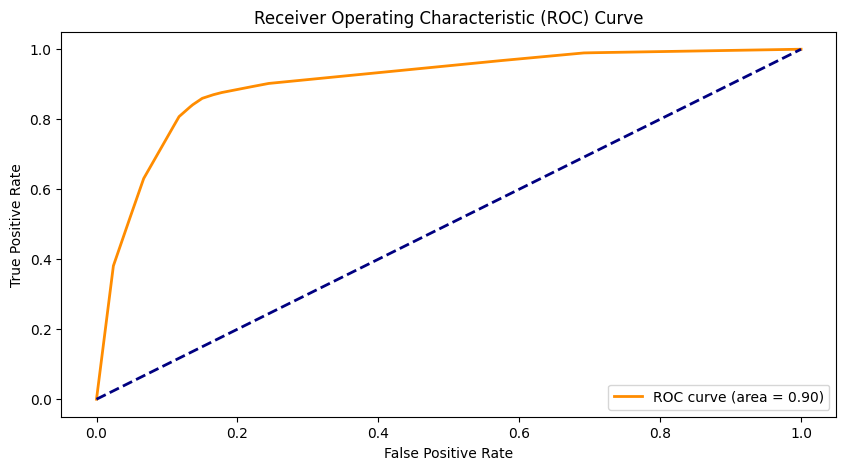

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


# Assuming dt_base is your DecisionTree model

# Predict probabilities for the positive class
y_train_prob = dt_base.predict_proba(X_train[selected_features])[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=[10, 5])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Hyperparameter Tuning after feature selection

In [243]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    "min_samples_split": [100, 200,500]
}

In [244]:
grid_search = GridSearchCV(estimator=dt_base,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [245]:
%%time
grid_search.fit(X_train[col], y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
CPU times: user 1.15 s, sys: 157 ms, total: 1.3 s
Wall time: 29.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [246]:
grid_search.best_score_

0.8663972971097122

In [247]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=100,
                       random_state=42)

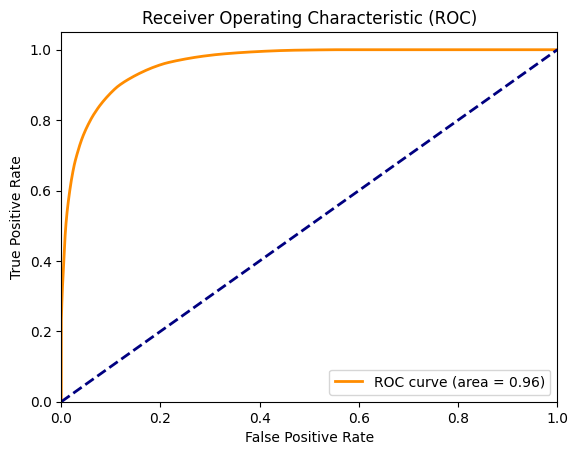

In [249]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities for the positive class
y_train_prob = dt_best.predict_proba(X_train[selected_features])[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

# Compute the AUC (Area under the ROC curve)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [250]:
y_train_pred = dt_best.predict(X_train[col])
y_test_pred = dt_best.predict(X_test[col])

In [251]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.8594062708472315
F1 score:  0.47995064774830354
Recall:  0.750965250965251
Precision:  0.3526745240253853
ROC_AUC_SCORE:  0.8103128554935785

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      5478
           1       0.35      0.75      0.48       518

    accuracy                           0.86      5996
   macro avg       0.66      0.81      0.70      5996
weighted avg       0.92      0.86      0.88      5996


 confussion matrix:
 [[4764  714]
 [ 129  389]]


After using recursive feature elimination to select the 12 most important features, we hyperparameter tuned our model, but our recall, accuracy, and precision only slightly improved. We will now try using a random forest model to see if we can get better results.

### Using Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

### Hyper-parameter tuning for the Random Forest

In [254]:
from sklearn.model_selection import RandomizedSearchCV

In [255]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [256]:
model_rcv = RandomizedSearchCV(estimator=rf,
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=4,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [257]:
%%time
model_rcv.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 40.5 s, sys: 1.76 s, total: 42.3 s
Wall time: 18min 43s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [258]:
model_rcv.best_score_

0.90591011990037

In [259]:
rf_best = model_rcv.best_estimator_
rf_best

RandomForestClassifier(max_depth=14, max_features=15, min_samples_leaf=20,
                       n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=42)

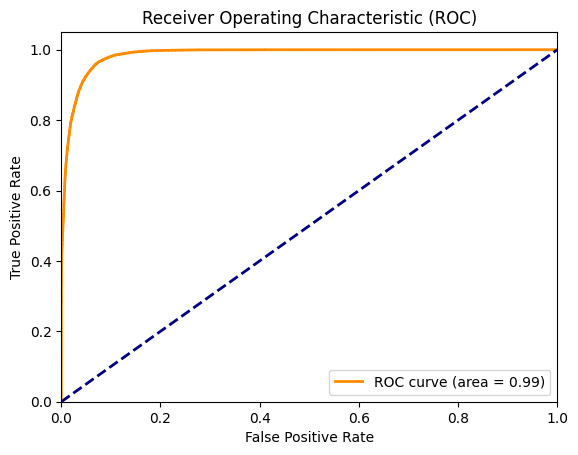

In [261]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_train_prob = rf_best.predict_proba(X_train)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

# Compute the AUC (Area under the ROC curve)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [262]:
y_test_pred = rf_best.predict(X_test)

In [263]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9122748498999332
F1 score:  0.6074626865671642
Recall:  0.7857142857142857
Precision:  0.4951338199513382
ROC_AUC_SCORE:  0.8549783549783548

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      5478
           1       0.50      0.79      0.61       518

    accuracy                           0.91      5996
   macro avg       0.74      0.85      0.78      5996
weighted avg       0.94      0.91      0.92      5996


 confussion matrix:
 [[5063  415]
 [ 111  407]]


We are satisfied with the performance of the random forest model with estimator as decision tree on our test data. It achieved good scores on all metrics, including accuracy, precision, recall, ROC AUC score, and F1. Therefore, we recommend this model for use in production.

In [264]:
rf_best.feature_importances_

array([3.40799837e-03, 5.17236364e-03, 6.44380499e-02, 2.68261449e-03,
       3.36100403e-03, 1.75383284e-02, 2.87425723e-03, 3.74030512e-03,
       3.95431769e-02, 3.30914396e-03, 9.21666809e-03, 1.12157909e-01,
       2.52020951e-03, 9.54815893e-03, 1.02911856e-01, 1.24803027e-03,
       3.45425256e-03, 1.47167727e-03, 5.23179815e-03, 6.21079844e-03,
       5.10097724e-02, 7.22842605e-04, 1.01480914e-03, 5.46697344e-04,
       4.66687581e-03, 5.10371023e-03, 1.36006618e-02, 6.11360064e-04,
       1.37920539e-03, 1.51555924e-03, 6.52190626e-03, 1.13532574e-02,
       3.64165954e-03, 2.24035196e-03, 1.50425931e-05, 0.00000000e+00,
       4.58951103e-03, 7.17818722e-03, 8.90969789e-02, 5.37619185e-03,
       5.62483962e-03, 4.01327264e-03, 1.69478627e-03, 1.14176285e-03,
       1.41127860e-03, 2.92699335e-03, 3.17999702e-03, 2.57932428e-02,
       1.51843128e-03, 1.82617069e-04, 2.06239014e-03, 1.50194387e-03,
       1.62398276e-03, 1.19617853e-03, 1.50295463e-03, 1.17395870e-03,
      

In [265]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [266]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
11,roam_ic_mou_8,0.112158
14,roam_og_mou_8,0.102912
38,loc_ic_mou_8,0.089097
65,last_day_rch_amt_8,0.072803
2,arpu_8,0.064438
62,max_rech_amt_8,0.058268
20,loc_og_mou_8,0.051010
8,offnet_mou_8,0.039543
59,total_rech_num_8,0.035141
47,std_ic_mou_8,0.025793


The most important features for our final model are all from the action phase. The top 10 features are:

roam_ic_mou_8

roam_og_mou_8

loc_ic_mou_8

last_day_rch_amt_8

arpu_8

max_rech_amt_8

loc_og_mou_8

offnet_mou_8

total_rech_num_8

std_ic_mou_8

## Recommendations for increasing customer usage


**Offer more free local incoming calls.** Customers are more likely to use their phones for local calls, so offering more free minutes for local incoming calls will be a great way to increase usage.

 **Reduce outgoing call charges.** This will make it more affordable for customers to make calls, which will also lead to increased usage.

**Offer free incoming calls on roaming.** This is a great way to attract customers who travel frequently.

**Provide attractive offers and packages.** This could include things like discounts on data plans, free streaming services, or early access to new devices.